In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv("churn_modelling.csv")

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
dataset.shape

(10000, 14)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
corr=dataset.corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

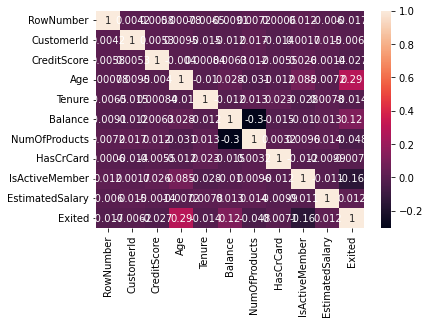

In [12]:
sns.heatmap(corr,annot=True)

<AxesSubplot:>

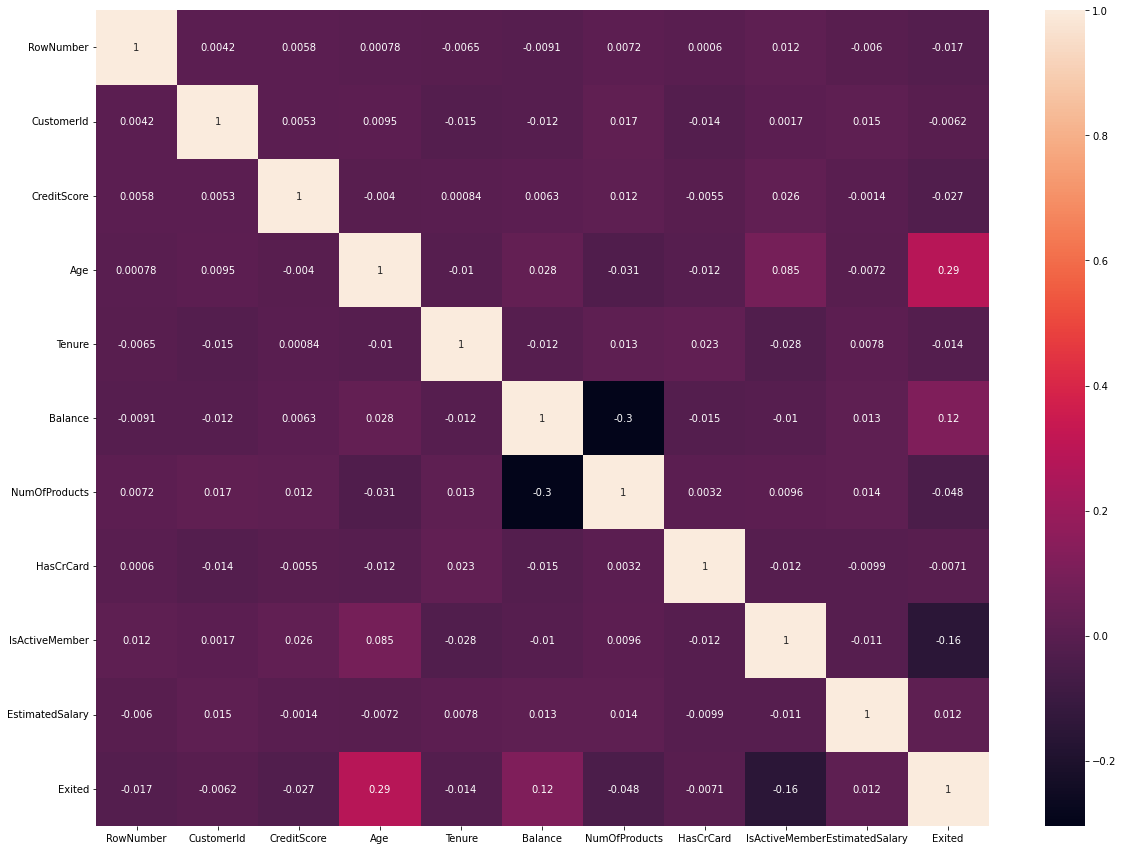

In [13]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [14]:
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
dataset.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# Handling null values

1. delete nan
2.delete row -column
3.imputing values...mean mode median

In [16]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [17]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

NO NEED OF HANDLING NULL VALUES

In [18]:
if we want to handle we can  with these commands

dataset["age"].fillna(dataset["age"].mean(),inplace=True)
dataset["Gender"].fillna(dataset["Gender"].mode()[0],inplace=True)

SyntaxError: invalid syntax (Temp/ipykernel_11772/1454190217.py, line 1)

# outliers

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

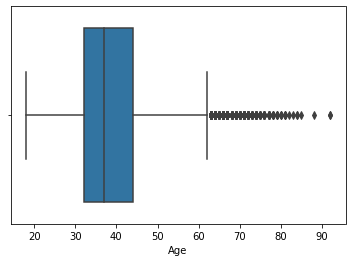

In [19]:

sns.boxplot(dataset.Age)

# seperate independent and dependent variables

In [20]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:

x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13:14]

In [22]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [24]:
dataset.shape

(10000, 14)

In [25]:

x.shape

(10000, 10)

In [26]:
y.shape

(10000, 1)

# 5.ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
x["Gender"]=le.fit_transform(x["Gender"])

In [30]:
x["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

In [31]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


### one hot encoding on geography column

In [32]:
geographyy=pd.get_dummies(x["Geography"],drop_first=True)

In [33]:
geographyy

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [34]:
x=pd.concat([x,geographyy],axis=1)

In [35]:
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0


In [36]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1


In [37]:
# no need of geography now we will drop
x.drop(["Geography"],axis=1,inplace=True)

In [38]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [39]:
x.shape

(10000, 11)

# split into training and testing 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 11), (3000, 11), (7000, 1), (3000, 1))

In [43]:
a=[1,2,3,4,5,6]
b=[1,0,2,4,2,4]
for i in range(5):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=0)
    print("with random state",a_train)

with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]
with random state [2, 4, 1, 5]


# feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [45]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [46]:
x_train

array([[-0.09792126,  0.92295821, -0.55759842, ..., -0.76862426,
        -0.56987189, -0.5731713 ],
       [-1.12612023,  0.92295821,  0.01725942, ..., -1.39359887,
        -0.56987189, -0.5731713 ],
       [-0.62230274, -1.08347268,  3.5622161 , ..., -1.49739308,
        -0.56987189, -0.5731713 ],
       ...,
       [ 0.89943174,  0.92295821, -0.36597914, ...,  1.41400417,
        -0.56987189, -0.5731713 ],
       [-0.62230274, -1.08347268, -0.07855022, ...,  0.84625811,
        -0.56987189,  1.74467913],
       [-0.28299708, -1.08347268,  0.87954618, ...,  0.32689267,
         1.75478035, -0.5731713 ]])

# ANN STARTS HERE

In [48]:
from keras.models import Sequential
from keras.layers import Dense
 

In [49]:
import tensorflow as tf

In [51]:
tf.__version__

'2.14.0'

#initialize the model

In [53]:
model=Sequential()

2.add input layer

In [57]:
model.add(Dense(units=11,activation="relu",kernel_initializer="random_uniform"))

3.ADD hidden layer

inp=n n\2=weights 

In [58]:
model.add(Dense(units=6,activation="relu",kernel_initializer="random_uniform"))

In [59]:
model.add(Dense(units=6,activation="relu",kernel_initializer="random_uniform"))

4. add output layer

(no.of outputs=based on your dataset,weights,activation fucntion) regression----relu binary classsification--- sigmoid categorical classification--sofmax

In [60]:
model.add(Dense(units=1,activation="sigmoid",kernel_initializer="random_uniform"))

5.configure the learning process

(loss fucntion,accuracy,optimizer) Regression--(MSE,MSE, adam/gd/sgd/mgd/adagrad) binary classification--(binary cross entropy,accuracy score,adam/gd/sgd/mgd/adagrad) categorical-----(categorical cross entropy,accuracy,adam/gd/sgd/mgd/adagrad)

In [61]:
#(loss fucntion,accuracy,optimizer)
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

6.fit the model on training data

(x_train,y_train,batch_size,epochs)

In [63]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8356
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3954 - accuracy: 0.8364
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3949 - accuracy: 0.8369
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8366
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8359
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8361
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8351
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8357
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8350
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3937 - accura

219/219 [==============================] - 1s 3ms/step - loss: 0.3914 - accuracy: 0.8361
Epoch 82/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.8363
Epoch 83/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8366
Epoch 84/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3909 - accuracy: 0.8360
Epoch 85/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8380
Epoch 86/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.8374
Epoch 87/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3917 - accuracy: 0.8369
Epoch 88/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8370
Epoch 89/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8363
Epoch 90/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 6)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 253 (1012.00 Byte)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. prediction

In [71]:
y_pred=model.predict(x_test)
y_pred

94/94 [==============================] - 0s 2ms/step


array([[0.27596542],
       [0.41500416],
       [0.18557021],
       ...,
       [0.10668732],
       [0.1220928 ],
       [0.48208684]], dtype=float32)

In [66]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
4004,0
7375,0
9307,0
8394,0


In [75]:
y_pred = np.where(y_pred >0.5 ,1 , 0)
y_pred = np.where(y_pred <0.5 ,0 , 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# accuracy

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred,)

0.793

# random value prediction

In [77]:
x.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1


In [78]:
model.predict(sc.transform([[619,0,42,2,0.0,1,1,1,101348.88,0,0]]))

1/1 [==============================] - 0s 40ms/step


array([[0.2596427]], dtype=float32)

In [79]:
model.save("ann.h5")

C:\Users\adarsha\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
